In [25]:
# 
# import math
# import numpy as np
# from scipy import integrate
# from numpy import diff 
# import pandas as pd 
# import os
# from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['lines.linewidth']= 1
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['ytick.labelsize'] = 28
plt.rcParams["font.family"] = "Times New Roman" 



In [26]:
# Load mocap data in cm, convert to mm.
X = 10*np.load('marks_cm.npy')

# Calculate overall COM to cancel overall body motion.
Xprime = X - X.mean(1, keepdims=True)



# Change to polar coordinates for rotation calculations.
theta = np.unwrap(np.arctan2(Xprime[...,1], Xprime[...,0]), axis=0)
R = np.linalg.norm(Xprime, axis=2, keepdims=True)

# Subtract all common rotation, and rotate 90° to match model.
thetaprime = theta - theta.mean(1, keepdims=True) - np.radians(90)

# Convert back to Cartesian coordinates, then center each marker.
Y = R*np.array((np.cos(thetaprime), np.sin(thetaprime))).transpose((1,2,0))
Y -= Y.mean(0) 

# Ridiculous fake transformation, but it works: undo the amplitude lost by
# each marker due to this transformation...
norm_Xprime = np.linalg.norm(Xprime, axis=2).var(0).mean()
norm_Y = np.linalg.norm(Y, axis=2).var(0).mean()
Yprime = Y  *  norm_Xprime / norm_Y

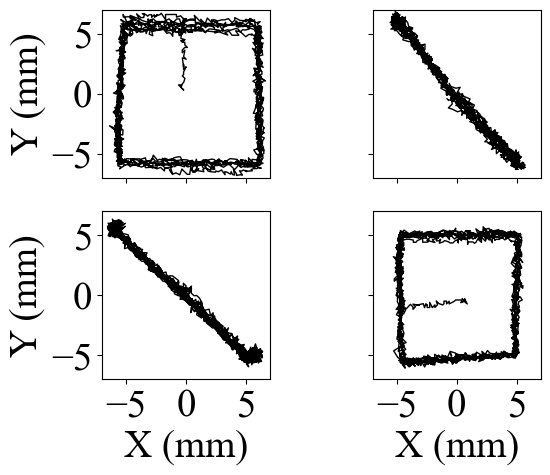

In [29]:
marker_index = [4, 3, 2, 1] 
for i in range(4):  
    plt.subplot(2, 2, marker_index[i]) 
    plt.plot(Yprime[:, i, 0], Yprime[:, i, 1], 'k')

    plt.xticks([-5, 0, 5])
    plt.yticks([-5, 0, 5])
    plt.xlim([-7, 7],)
    plt.ylim([-7, 7])

    ax=plt.gca()
    ax.set_aspect(1) 
    if i==0:   
        ax.set_yticklabels(())
        plt.xlabel('X (mm)') 
    if i==1: 
        plt.xlabel('X (mm)')
        plt.ylabel('Y (mm)') 
    if i==2: 
        ax.set_xticklabels(())
        ax.set_yticklabels(()) 
    if i==3: 
        ax.set_xticklabels(())
        plt.ylabel('Y (mm)') 
 